In [632]:
import pandas as pd
import numpy as np
import os
import csv
import scipy.stats as st
import matplotlib.pyplot as plt


#data file to work with
file = os.path.join('cleanData', 'CleanFullDataSet.csv')

#read data file
main_data = pd.read_csv(file, low_memory = False)

In [633]:
labor_df = pd.DataFrame(main_data[['yearOfRegistration', 'gender', 'ageBroad', 'Citizenship Country','typeOfLabourConcatenated','typeOfSexConcatenated','Exploit Sub-Region', 'Exploit Country']])
labor_df.head(5)

,yearOfRegistration,gender,ageBroad,Citizenship Country,typeOfLabourConcatenated,typeOfSexConcatenated,Exploit Sub-Region,Exploit Country
0,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
1,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
2,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
3,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
4,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown


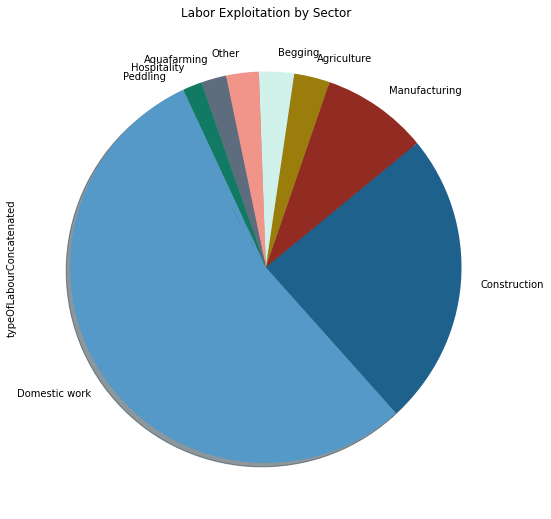

In [634]:
labor_pie_df = labor_df['typeOfLabourConcatenated'].value_counts()

#drop unknowns from the labour df
labor_pie_df = labor_pie_df.drop('unknown')

#Plot a pie chart of the Labor demographics by sector
labor_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation by Sector", shadow=True, colors = ['#5499C7', '#1F618D', '#922B21', '#9A7D0A', '#D1F2EB', '#F1948A', '#5D6D7E', '#117A65'], figsize=(9, 9))

In [635]:
country_count = labor_df["Exploit Country"].value_counts()

In [636]:
exp_count = labor_df['Exploit Sub-Region'].value_counts()
exp_count


Eastern Europe                     14020
Northern America                   12512
unknown                            10175
South-eastern Asia                  6139
Western Asia                        1776
Sub-Saharan Africa                  1268
Southern Europe                      615
Central Asia                         495
Latin America and the Caribbean      455
Eastern Asia                         221
Southern Asia                        155
Northern Africa                       24
Western Europe                        24
Northern Europe                       17
Name: Exploit Sub-Region, dtype: int64

In [637]:
#labour by country data frame 
country_df = pd.DataFrame(main_data[['typeOfLabourConcatenated', 'Exploit Sub-Region']])
country_df.head()
known_labor_df = country_df[country_df.typeOfLabourConcatenated != 'unknown']
region_df = pd.DataFrame(main_data[['typeOfLabourConcatenated', 'Exploit Country']])
known_labor_df2 = region_df[region_df.typeOfLabourConcatenated != 'unknown']

In [638]:
#Datatable of Citizenship Country and Labour Sector
known_labor_df.tail(5)

,typeOfLabourConcatenated,Exploit Sub-Region
48753,Peddling,Northern America
48754,Peddling,Northern America
48755,Peddling,Northern America
48756,Peddling,Northern America
48757,Peddling,Northern America


In [639]:
region_df = known_labor_df.groupby(["Exploit Sub-Region"])
region_df = region_df['typeOfLabourConcatenated'].value_counts()


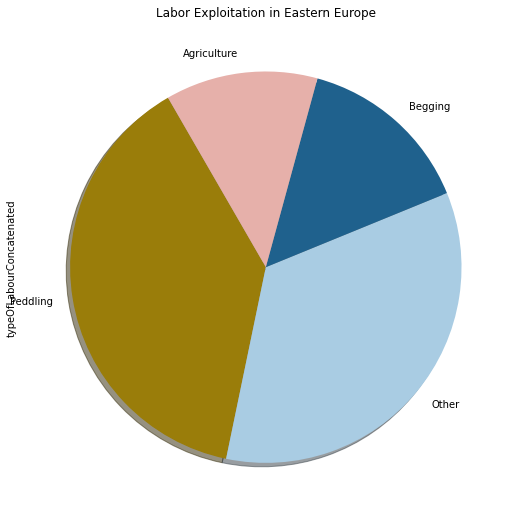

In [640]:
eastern_europe_labor_df = country_df[country_df["Exploit Sub-Region"] == 'Northern America']
eastern_pie_df = eastern_europe_labor_df['typeOfLabourConcatenated'].value_counts()
eastern_pie_df = eastern_pie_df.drop('unknown')
eastern_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation in Eastern Europe", shadow=True, colors = ['#9A7D0A', '#A9CCE3', '#1F618D', '#E6B0AA', '#117A65', '#F1948A', '#117A65', 'aqua'], figsize=(9, 9))

In [641]:
#TO DO: Pick certain high volume countries for in depth analysis?

#List of high volume countries to pick: United States, Ukraine, Moldova, Russia, Philippines, Ghana, Indonesia, Malaysia,
#Ghana, Indonesia, Malaysia, Cambodia, UAE, Thailand
example_countries_df = known_labor_df2.groupby(["Exploit Country"])
example_countries_df = example_countries_df['typeOfLabourConcatenated'].value_counts()
example_countries_df

Exploit Country           typeOfLabourConcatenated
Afghanistan               Begging                       24
                          Construction                  21
                          Hospitality                   13
Cambodia                  Other                         12
China                     Other                          7
Ghana                     Other                         47
Haiti                     Domestic work                103
                          Other                          5
Hong Kong                 Domestic work                 31
India                     Domestic work                 46
Indonesia                 Aquafarming                   94
                          Domestic work                 21
Japan                     Domestic work                 11
Jordan                    Domestic work                 85
Kazakhstan                Construction                 126
Kuwait                    Domestic work                 90
Libya

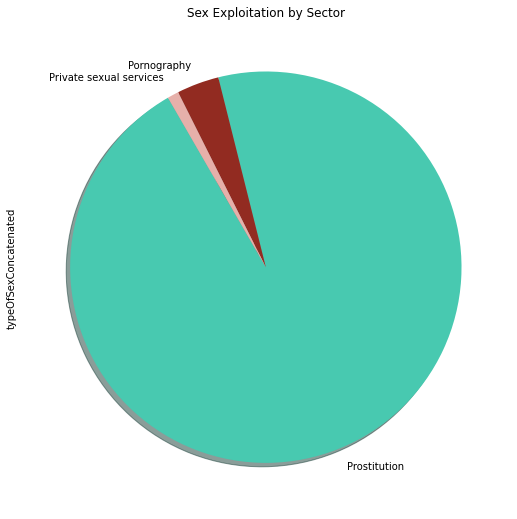

In [642]:
sex_df = pd.DataFrame(main_data[['yearOfRegistration', 'gender', 'ageBroad', 'Citizenship Country','typeOfSexConcatenated','Exploit Sub-Region', 'Exploit Country']])
sex_df.head(5)
sex_chart_df = sex_df['typeOfSexConcatenated'].value_counts()
sex_chart_df = sex_chart_df.drop('unknown')

#Plot a pie chart of the Labor demographics by sector
sex_chart_df.plot(kind="pie",startangle=120, title = "Sex Exploitation by Sector", shadow=True, colors = ['#48C9B0', '#922B21', '#E6B0AA'], figsize=(9, 9))

In [643]:
sex_chart_df.head()

Prostitution               4386
Pornography                 160
Private sexual services      43
Name: typeOfSexConcatenated, dtype: int64

In [644]:
sex_df.groupby(['Exploit Sub-Region']).count()

,yearOfRegistration,gender,ageBroad,Citizenship Country,typeOfSexConcatenated,Exploit Country
Exploit Sub-Region,,,,,,
Central Asia,495,495,495,495,495,495
Eastern Asia,221,221,221,221,221,221
Eastern Europe,14020,14020,14020,14020,14020,14020
Latin America and the Caribbean,455,455,455,455,455,455
Northern Africa,24,24,24,24,24,24
Northern America,12512,12512,12512,12512,12512,12512
Northern Europe,17,17,17,17,17,17
South-eastern Asia,6139,6139,6139,6139,6139,6139
Southern Asia,155,155,155,155,155,155


In [645]:
sex_year_df= pd.DataFrame(main_data[['yearOfRegistration','typeOfSexConcatenated']])

In [646]:
sex_year_df.head()

,yearOfRegistration,typeOfSexConcatenated
0,2002,unknown
1,2002,unknown
2,2002,unknown
3,2002,unknown
4,2002,unknown


In [647]:
known_sex_df = sex_year_df[sex_year_df.typeOfSexConcatenated == 'Prostitution']
known_sex_df2 = known_sex_df.groupby(["yearOfRegistration"])
known_sex_df2.head()

,yearOfRegistration,typeOfSexConcatenated
18589,2015,Prostitution
18590,2015,Prostitution
18591,2015,Prostitution
18592,2015,Prostitution
18593,2015,Prostitution
33270,2016,Prostitution
33271,2016,Prostitution
33272,2016,Prostitution
33273,2016,Prostitution
33274,2016,Prostitution


In [648]:
known_sex_df2.count()

,typeOfSexConcatenated
yearOfRegistration,
2015,612
2016,1164
2017,1437
2018,1173


In [649]:
full_df = pd.DataFrame(main_data[['Exploit Sub-Region','typeOfLabourAgriculture','typeOfLabourAquafarming','typeOfLabourBegging','typeOfLabourConstruction','typeOfLabourDomesticWork','typeOfLabourHospitality','typeOfLabourManufacturing','typeOfLabourMiningOrDrilling','typeOfLabourPeddling','typeOfLabourTransportation','typeOfLabourOther']])

In [650]:
full_df = full_df[full_df['Exploit Sub-Region'] != 'unknown']
full_df = full_df.groupby(['Exploit Sub-Region'])
labor_bar_df = pd.DataFrame({'Agriculture': full_df['typeOfLabourAgriculture'].sum(), 'Aquafarming': full_df['typeOfLabourAquafarming'].sum(),
                      'Begging' : full_df['typeOfLabourBegging'].sum(), 'Construction': full_df['typeOfLabourConstruction'].sum(),
                      'Domestic Work': full_df['typeOfLabourDomesticWork'].sum(), 'Hospitality': full_df['typeOfLabourHospitality'].sum(), 
                      'Manufacturing': full_df['typeOfLabourManufacturing'].sum(),
                      'Mining' : full_df['typeOfLabourMiningOrDrilling'].sum(),
                      'Peddling': full_df['typeOfLabourPeddling'].sum(), 'Transportation' :full_df['typeOfLabourTransportation'].sum(), 'Other': full_df['typeOfLabourOther'].sum()})

In [651]:
labor_bar_df

,Agriculture,Aquafarming,Begging,Construction,Domestic Work,Hospitality,Manufacturing,Mining,Peddling,Transportation,Other
Exploit Sub-Region,,,,,,,,,,,
Central Asia,0,0,0,126,0,0,0,0,0,0,0
Eastern Asia,0,0,0,0,42,0,0,0,0,0,7
Eastern Europe,133,0,0,1107,11,15,325,0,0,0,5
Latin America and the Caribbean,0,0,0,0,103,0,0,0,0,0,5
Northern Africa,0,0,0,0,11,0,0,0,0,0,0
Northern America,19,0,22,0,0,0,0,0,58,0,52
Northern Europe,0,0,0,0,0,0,0,0,0,0,0
South-eastern Asia,0,94,0,0,896,15,89,0,0,0,15
Southern Asia,0,0,24,21,46,13,0,0,0,0,0


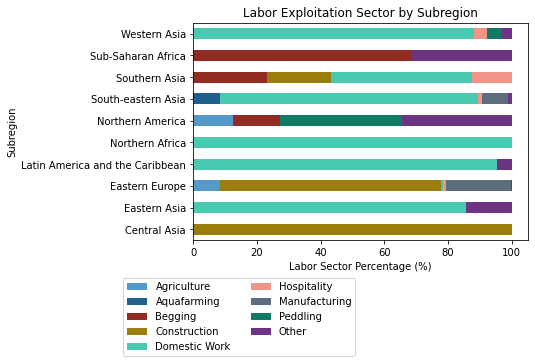

In [652]:
#Create a stacked percentage bar graph of Labor Exploitation per sector per region
labor_bar_df = labor_bar_df.drop(['Western Europe', 'Northern Europe', 'Southern Europe'])
labor_bar_df = labor_bar_df.drop(columns=['Transportation', 'Mining'])
stacked_data = labor_bar_df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True, color=['#5499C7', '#1F618D', '#922B21', '#9A7D0A', '#48C9B0', '#F1948A', '#5D6D7E', '#117A65', '#6C3483'])
plt.title("Labor Exploitation Sector by Subregion")
plt.xlabel("Labor Sector Percentage (%)")
plt.ylabel("Subregion")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.plot(45,45)

In [653]:
timeline_df = pd.DataFrame(main_data[['yearOfRegistration','typeOfLabourAgriculture','typeOfLabourAquafarming','typeOfLabourBegging','typeOfLabourConstruction','typeOfLabourDomesticWork','typeOfLabourHospitality','typeOfLabourManufacturing','typeOfLabourMiningOrDrilling','typeOfLabourPeddling','typeOfLabourTransportation','typeOfLabourOther']])
timeline_df = timeline_df[timeline_df['yearOfRegistration'] != 'unknown']
timeline_df = timeline_df.groupby(['yearOfRegistration'])
timeline2_df = pd.DataFrame({'Agriculture': timeline_df['typeOfLabourAgriculture'].sum(), 'Aquafarming': timeline_df['typeOfLabourAquafarming'].sum(),
                      'Begging' : timeline_df['typeOfLabourBegging'].sum(), 'Construction': timeline_df['typeOfLabourConstruction'].sum(),
                      'Domestic Work': timeline_df['typeOfLabourDomesticWork'].sum(), 'Hospitality': timeline_df['typeOfLabourHospitality'].sum(), 
                      'Manufacturing': timeline_df['typeOfLabourManufacturing'].sum(),
                      'Mining' : timeline_df['typeOfLabourMiningOrDrilling'].sum(),
                      'Peddling': timeline_df['typeOfLabourPeddling'].sum(), 'Transportation' :timeline_df['typeOfLabourTransportation'].sum(), 'Other': timeline_df['typeOfLabourOther'].sum()})

C:\Users\sumit\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [654]:
timeline2_df

,Agriculture,Aquafarming,Begging,Construction,Domestic Work,Hospitality,Manufacturing,Mining,Peddling,Transportation,Other
yearOfRegistration,,,,,,,,,,,
2002,0,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,22,28,0,0,0,0,32
2006,0,0,0,0,258,0,0,0,0,0,29
2007,0,0,21,0,0,0,0,0,0,0,1
2008,31,0,12,23,0,0,0,0,0,0,0
2009,0,0,0,15,0,0,0,0,0,0,0
2010,37,0,0,198,0,0,13,0,0,0,0


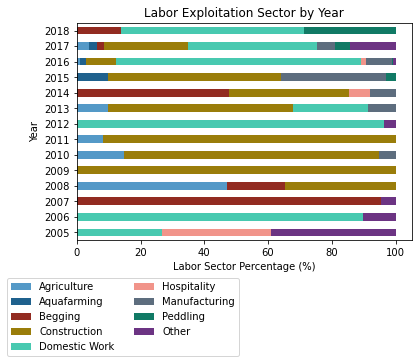

In [655]:
#Create a stacked percentage bar graph of Labor Exploitation per sector per region
timeline2_df = timeline2_df.drop([2002, 2003, 2004])
timeline2_df = timeline2_df.drop(columns=['Transportation', 'Mining'])
stacked_data2 = timeline2_df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data2.plot(kind="barh", stacked=True, color =['#5499C7', '#1F618D', '#922B21', '#9A7D0A', '#48C9B0', '#F1948A', '#5D6D7E', '#117A65', '#6C3483'])
plt.title("Labor Exploitation Sector by Year")
plt.xlabel("Labor Sector Percentage (%)")
plt.ylabel("Year")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.plot(12,12)